In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
shot_df = pd.read_csv("Hackathon_sv_shot_summary_2015-16.txt", sep=" ")
shot_df_15 = pd.read_csv("Hackathon_sv_shot_summary_2014-15.txt", sep=" ")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,1,2,3,5,6,8,9,11,12,13,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
shot_df_16.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222318 entries, 1 to 222317
Data columns (total 21 columns):
SEASON                    222318 non-null object
GAME_ID                   222318 non-null object
SV_GAME_ID                222318 non-null object
GAME_DATE                 222318 non-null object
TEAM_ID                   222318 non-null object
SV_TEAM_ID                222318 non-null object
SHOT_TAKER_TEAM           222318 non-null object
PERSON_ID                 222318 non-null object
SV_PLAYER_ID              222318 non-null object
SHOT_RESULT               222318 non-null object
PERIOD                    222318 non-null object
GAME_CLOCK                222318 non-null object
WALL_CLOCK                222318 non-null object
DRIBBLES                  222318 non-null object
SHOT_DIST                 222318 non-null object
TOUCH_TIME                222318 non-null object
CLOSE_DEF_PERSON_ID       222318 non-null object
CLOSE_DEF_SV_PLAYER_ID    222318 non-null object
CLOSE_DEF_DI

In [9]:
pd.options.display.max_columns = None
display(shot_df_16.head())


,SEASON,GAME_ID,SV_GAME_ID,GAME_DATE,TEAM_ID,SV_TEAM_ID,SHOT_TAKER_TEAM,PERSON_ID,SV_PLAYER_ID,SHOT_RESULT,PERIOD,GAME_CLOCK,WALL_CLOCK,DRIBBLES,SHOT_DIST,TOUCH_TIME,CLOSE_DEF_PERSON_ID,CLOSE_DEF_SV_PLAYER_ID,CLOSE_DEF_DIST,PT_VALUE,PTS
1,2015,21500001,2015102701,10/27/2015,1610612765,8,Detroit Pistons,2581,3741,missed,1,1,1445992450930,3,40.1,1.87,203934,5359,0.68,3,0.0
2,2015,21500001,2015102701,10/27/2015,1610612737,1,Atlanta Hawks,203471,5187,missed,1,4,1445992411492,16,2.43,16.96,202694,4895,2.9,2,0.0
3,2015,21500001,2015102701,10/27/2015,1610612737,1,Atlanta Hawks,203934,5359,made,1,33,1445992376173,0,21.09,0.84,202694,4895,4.03,3,3.0
4,2015,21500001,2015102701,10/27/2015,1610612737,1,Atlanta Hawks,203471,5187,made,1,71,1445992338495,13,4.6,9.88,202694,4895,0.97,2,2.0
5,2015,21500001,2015102701,10/27/2015,1610612765,8,Detroit Pistons,202694,4895,missed,1,84,1445992306896,3,22.59,5.42,201143,4245,4.52,2,0.0


In [10]:
#Data prep
shot_df = pd.read_csv("Hackathon_sv_shot_summary_2015-16.txt", sep=" ")

#shot_df = shot_df.append(shot_df_15)

#have 165 occurences of null for closet defender id
shot_df = shot_df.replace({'(null)': -1})

#shot_df = shot_df.drop(shot_df.index[222316])
shot_df = shot_df[shot_df['SEASON'] != "GAME_ID"]

#convert columns to numbers
shot_df[["SEASON", "GAME_ID", "SV_GAME_ID", "TEAM_ID", "SV_TEAM_ID", "PERSON_ID", "SV_PLAYER_ID", "PERIOD", "GAME_CLOCK", "WALL_CLOCK", "DRIBBLES", "SHOT_DIST", "TOUCH_TIME", "CLOSE_DEF_PERSON_ID", "CLOSE_DEF_SV_PLAYER_ID", "CLOSE_DEF_DIST", "PT_VALUE", "PTS"]] = shot_df[["SEASON", "GAME_ID", "SV_GAME_ID", "TEAM_ID", "SV_TEAM_ID", "PERSON_ID", "SV_PLAYER_ID", "PERIOD", "GAME_CLOCK", "WALL_CLOCK", "DRIBBLES", "SHOT_DIST", "TOUCH_TIME", "CLOSE_DEF_PERSON_ID", "CLOSE_DEF_SV_PLAYER_ID", "CLOSE_DEF_DIST", "PT_VALUE", "PTS"]].apply(pd.to_numeric)

#convert missed/made to 0/1
shot_df['SHOT_RESULT'] = shot_df['SHOT_RESULT'].replace({'missed': 0})
shot_df['SHOT_RESULT'] = shot_df['SHOT_RESULT'].replace({'made': 1})

#classify shot distances
shot_df.loc[shot_df['PT_VALUE'] == 3, 'SHOT_TYPE'] = "Three Pointer"
shot_df.loc[(shot_df['SHOT_DIST'] >= 15) & (shot_df['PT_VALUE'] == 2), 'SHOT_TYPE'] = "Long Two-Pointer"
shot_df.loc[(shot_df['SHOT_DIST'] >= 5) & (shot_df['SHOT_DIST'] < 15), 'SHOT_TYPE'] = "Midrange"
shot_df.loc[shot_df['SHOT_DIST']< 5, 'SHOT_TYPE'] = "Layup"
shot_df.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,1,2,3,5,6,8,9,11,12,13,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEASON,GAME_ID,SV_GAME_ID,GAME_DATE,TEAM_ID,SV_TEAM_ID,SHOT_TAKER_TEAM,PERSON_ID,SV_PLAYER_ID,SHOT_RESULT,...,WALL_CLOCK,DRIBBLES,SHOT_DIST,TOUCH_TIME,CLOSE_DEF_PERSON_ID,CLOSE_DEF_SV_PLAYER_ID,CLOSE_DEF_DIST,PT_VALUE,PTS,SHOT_TYPE
1,2015,21500001,2015102701,10/27/2015,1610612765,8,Detroit Pistons,2581,3741,0,...,1445992450930,3,40.10,1.87,203934,5359,0.68,3,0.0,Three Pointer
2,2015,21500001,2015102701,10/27/2015,1610612737,1,Atlanta Hawks,203471,5187,0,...,1445992411492,16,2.43,16.96,202694,4895,2.90,2,0.0,Layup
3,2015,21500001,2015102701,10/27/2015,1610612737,1,Atlanta Hawks,203934,5359,1,...,1445992376173,0,21.09,0.84,202694,4895,4.03,3,3.0,Three Pointer
4,2015,21500001,2015102701,10/27/2015,1610612737,1,Atlanta Hawks,203471,5187,1,...,1445992338495,13,4.60,9.88,202694,4895,0.97,2,2.0,Layup
5,2015,21500001,2015102701,10/27/2015,1610612765,8,Detroit Pistons,202694,4895,0,...,1445992306896,3,22.59,5.42,201143,4245,4.52,2,0.0,Long Two-Pointer


In [61]:
# link name and NBA player ID
text = open("Hackathon_player_names_matched_team.txt")
line = text.readline()
line = text.readline()
IDtoName = {} # ID as keys
NametoID = {} # name as keys

while line != "" :
    data = line.split()
    name = data[4] + " " + data[5]
    name = name.replace("\"","")
    ID = (float(data[3]))
    if ID not in IDtoName:
        IDtoName[ID] = name
    if name not in NametoID:
        NametoID[name] = ID
    line = text.readline()
    
#print(NametoID["LeBron James"])
#print(IDtoName[2544])



shot_df_name = pd.read_csv("Hackathon_sv_shot_summary_2015-16.txt", sep=" ")

#have 165 occurences of null for closet defender id
shot_df_name = shot_df_name.replace({'(null)': -1})

#shot_df = shot_df.drop(shot_df.index[222316])
shot_df_name = shot_df_name[shot_df_name['SEASON'] != "GAME_ID"]

shot_df_name = shot_df_name[['PERSON_ID', 'SV_PLAYER_ID']]

#convert columns to numbers
shot_df_name[['PERSON_ID', 'SV_PLAYER_ID']] = shot_df_name[['PERSON_ID', 'SV_PLAYER_ID']].apply(pd.to_numeric).drop_duplicates()


names_df = pd.DataFrame(list(NametoID.items()), columns = ['NAME', 'PERSON_ID'])

names_df = pd.merge(names_df, shot_df_name,  how='left', left_on='PERSON_ID', right_on = 'PERSON_ID')

names_df = names_df.dropna()


shot_df_name = pd.merge(shot_df_name, names_df,  how='left', left_on='SV_PLAYER_ID', right_on = 'SV_PLAYER_ID')


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,1,2,3,5,6,8,9,11,12,13,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [69]:
shot_df_name_group = shot_df_name.groupby(["NAME"])
display(shot_df_name_group.head())

,PERSON_ID_x,SV_PLAYER_ID,NAME,PERSON_ID_y
0,2.581000e+03,3741.0,Steve Blake,2581.0
1,2.581000e+03,3741.0,Steven Blake,2581.0
2,2.034710e+05,5187.0,Dennis Schroder,203471.0
3,2.039340e+05,5359.0,Lamar Patterson,203934.0
4,NaN,NaN,NaN,NaN
5,2.026940e+05,4895.0,Marcus Morris,202694.0
6,NaN,NaN,NaN,NaN
7,2.007940e+05,4175.0,Paul Millsap,200794.0
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


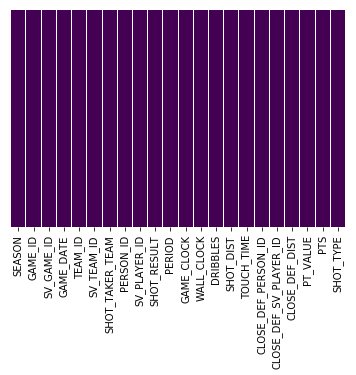

In [18]:
#look for missing data
sns.heatmap(shot_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


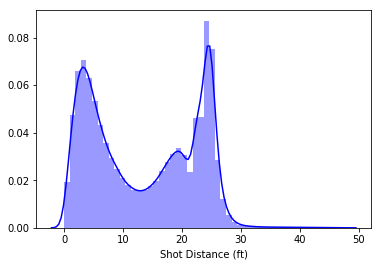

In [25]:
shot_dist_plot = sns.distplot(shot_df['SHOT_DIST'],kde=True, color = 'blue', axlabel = 'Shot Distance (ft)')
shot_dist_plot.get_figure().savefig("shot_dist.png")

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


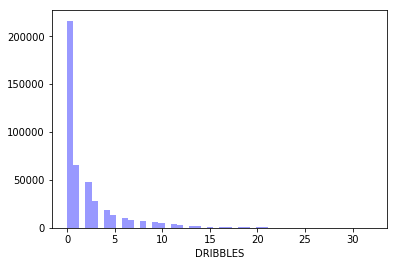

In [49]:
sns.distplot(shot_df['DRIBBLES'],kde=False, color = 'blue')

[Text(0,0.5,'Percent')]

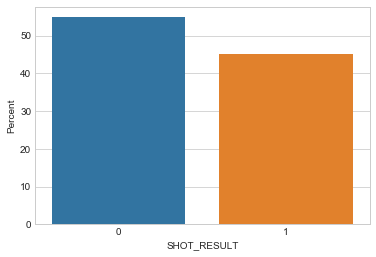

In [150]:
ax = sns.barplot(x="SHOT_RESULT", y="SHOT_RESULT", data=shot_df, estimator=lambda x: len(x) / len(shot_df) * 100)
ax.set(ylabel="Percent")

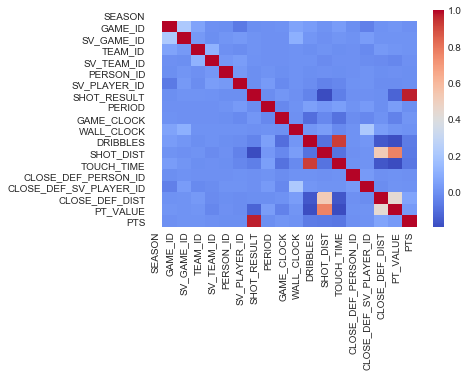

In [151]:
sns.heatmap(shot_df.corr(),cmap='coolwarm')

In [11]:
ax = sns.scatterplot(x="SHOT_DIST", y="CLOSE_DEF_DIST", data=shot_df)

AttributeError: module 'seaborn' has no attribute 'scatterplot'

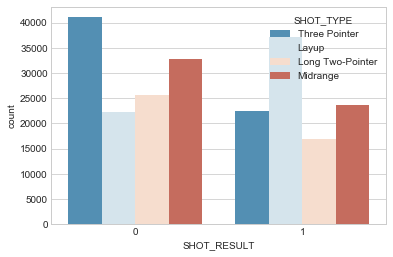

In [168]:
sns.set_style('whitegrid')
sns.countplot(x='SHOT_RESULT',hue='SHOT_TYPE',data=shot_df,palette='RdBu_r')

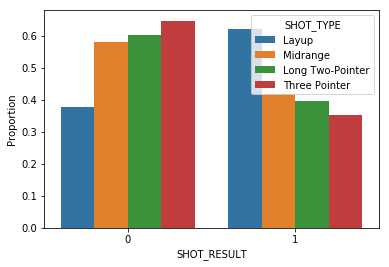

In [35]:
hue, y, x = "SHOT_TYPE", "Proportion", "SHOT_RESULT"

shot_type_plot = (shot_df[x]
 .groupby(shot_df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, hue_order = ["Layup", "Midrange", "Long Two-Pointer", "Three Pointer"]))


shot_type_plot.get_figure().savefig("shot_type.png")



In [47]:
made_threes = len(shot_df.loc[(shot_df['SHOT_TYPE'] == "Layup") & (shot_df['SHOT_RESULT'] == 1)])
three_taken = len(shot_df.loc[(shot_df['SHOT_TYPE'] == "Layup")])
made_threes/three_taken



0.6208550927694986

In [ ]:
three_pointers_df = shot_df.loc[df['SHOT_TYPE'] == "Three Pointer"]
long_twos_df = shot_df.loc[df['SHOT_TYPE'] == "Long Two-Pointer"]
midrange_df = shot_df.loc[df['SHOT_TYPE'] == "Midrange"]
layup_df = shot_df.loc[df['SHOT_TYPE'] == "Layup"]

survived_hist=np.histogram(df_survived['Age'],bins=age_bins,range=(0,80))

shot_rates=survived_hist[0]/(survived_hist[0]+not_survive_hist[0])

## Moving onto ML##


In [228]:
#Data prep
shot_df = pd.read_csv("Hackathon_sv_shot_summary_2015-16.txt", sep=" ")

#have 165 occurences of null for closet defender id
shot_df = shot_df.replace({'(null)': -1})

#shot_df = shot_df.drop(shot_df.index[222316])
shot_df = shot_df[shot_df['SEASON'] != "GAME_ID"]

#convert columns to numbers
shot_df[["SEASON", "GAME_ID", "SV_GAME_ID", "TEAM_ID", "SV_TEAM_ID", "PERSON_ID", "SV_PLAYER_ID", "PERIOD", "GAME_CLOCK", "WALL_CLOCK", "DRIBBLES", "SHOT_DIST", "TOUCH_TIME", "CLOSE_DEF_PERSON_ID", "CLOSE_DEF_SV_PLAYER_ID", "CLOSE_DEF_DIST", "PT_VALUE", "PTS"]] = shot_df[["SEASON", "GAME_ID", "SV_GAME_ID", "TEAM_ID", "SV_TEAM_ID", "PERSON_ID", "SV_PLAYER_ID", "PERIOD", "GAME_CLOCK", "WALL_CLOCK", "DRIBBLES", "SHOT_DIST", "TOUCH_TIME", "CLOSE_DEF_PERSON_ID", "CLOSE_DEF_SV_PLAYER_ID", "CLOSE_DEF_DIST", "PT_VALUE", "PTS"]].apply(pd.to_numeric)

#convert missed/made to 0/1
shot_df['SHOT_RESULT'] = shot_df['SHOT_RESULT'].replace({'missed': 0})
shot_df['SHOT_RESULT'] = shot_df['SHOT_RESULT'].replace({'made': 1})

#classify shot distances
shot_df.loc[shot_df['PT_VALUE'] == 3, 'SHOT_TYPE'] = "Three Pointer"
shot_df.loc[(shot_df['SHOT_DIST'] >= 15) & (shot_df['PT_VALUE'] == 2), 'SHOT_TYPE'] = "Long Two-Pointer"
shot_df.loc[(shot_df['SHOT_DIST'] >= 5) & (shot_df['SHOT_DIST'] < 15), 'SHOT_TYPE'] = "Midrange"
shot_df.loc[shot_df['SHOT_DIST']< 5, 'SHOT_TYPE'] = "Layup"
shot_df.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,1,2,3,5,6,8,9,11,12,13,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEASON,GAME_ID,SV_GAME_ID,GAME_DATE,TEAM_ID,SV_TEAM_ID,SHOT_TAKER_TEAM,PERSON_ID,SV_PLAYER_ID,SHOT_RESULT,PERIOD,GAME_CLOCK,WALL_CLOCK,DRIBBLES,SHOT_DIST,TOUCH_TIME,CLOSE_DEF_PERSON_ID,CLOSE_DEF_SV_PLAYER_ID,CLOSE_DEF_DIST,PT_VALUE,PTS,SHOT_TYPE
1,2015,21500001,2015102701,10/27/2015,1610612765,8,Detroit Pistons,2581,3741,0,1,1,1445992450930,3,40.10,1.87,203934,5359,0.68,3,0.0,Three Pointer
2,2015,21500001,2015102701,10/27/2015,1610612737,1,Atlanta Hawks,203471,5187,0,1,4,1445992411492,16,2.43,16.96,202694,4895,2.90,2,0.0,Layup
3,2015,21500001,2015102701,10/27/2015,1610612737,1,Atlanta Hawks,203934,5359,1,1,33,1445992376173,0,21.09,0.84,202694,4895,4.03,3,3.0,Three Pointer
4,2015,21500001,2015102701,10/27/2015,1610612737,1,Atlanta Hawks,203471,5187,1,1,71,1445992338495,13,4.60,9.88,202694,4895,0.97,2,2.0,Layup
5,2015,21500001,2015102701,10/27/2015,1610612765,8,Detroit Pistons,202694,4895,0,1,84,1445992306896,3,22.59,5.42,201143,4245,4.52,2,0.0,Long Two-Pointer


In [229]:
#Catogorical Features
shot_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222317 entries, 1 to 222317
Data columns (total 22 columns):
SEASON                    222317 non-null int64
GAME_ID                   222317 non-null int64
SV_GAME_ID                222317 non-null int64
GAME_DATE                 222317 non-null object
TEAM_ID                   222317 non-null int64
SV_TEAM_ID                222317 non-null int64
SHOT_TAKER_TEAM           222317 non-null object
PERSON_ID                 222317 non-null int64
SV_PLAYER_ID              222317 non-null int64
SHOT_RESULT               222317 non-null int64
PERIOD                    222317 non-null int64
GAME_CLOCK                222317 non-null int64
WALL_CLOCK                222317 non-null int64
DRIBBLES                  222317 non-null int64
SHOT_DIST                 222317 non-null float64
TOUCH_TIME                222317 non-null float64
CLOSE_DEF_PERSON_ID       222317 non-null int64
CLOSE_DEF_SV_PLAYER_ID    222317 non-null int64
CLOSE_DEF_DIST          

In [230]:
# remove season, game_ID, SV_game_ID, Wall_clock, PT-Value, PTS
#shot_df.drop(['SEASON','GAME_ID','SV_GAME_ID','GAME_DATE', 'WALL_CLOCK', 'SHOT_TAKER_TEAM','PT_VALUE', 'PTS', 'SHOT_TYPE'],axis=1,inplace=True)


#drop everything but shot distance
shot_df = shot_df[['SHOT_RESULT', "SHOT_DIST", "DRIBBLES", "CLOSE_DEF_DIST"]]

shot_df.head()


,SHOT_RESULT,SHOT_DIST,DRIBBLES,CLOSE_DEF_DIST
1,0,40.10,3,0.68
2,0,2.43,16,2.90
3,1,21.09,0,4.03
4,1,4.60,13,0.97
5,0,22.59,3,4.52


In [231]:
from sklearn.model_selection import train_test_split

In [232]:
X_train, X_test, y_train, y_test = train_test_split(shot_df.drop('SHOT_RESULT',axis=1), 
                                                    shot_df['SHOT_RESULT'], test_size=0.2, 
                                                    random_state=101)

In [233]:
from sklearn.linear_model import LogisticRegression

In [234]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [235]:
predictions = logmodel.predict(X_test)

In [236]:
from sklearn.metrics import classification_report, confusion_matrix

In [237]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.62      0.70      0.66     24453
          1       0.57      0.49      0.53     20011

avg / total       0.60      0.60      0.60     44464



In [238]:
print(confusion_matrix(y_test,predictions))

[[17039  7414]
 [10243  9768]]


In [194]:
X_train.head()

,SHOT_DIST,DRIBBLES
95135,14.71,1
69865,22.85,1
111154,4.78,1
3964,23.99,1
67585,17.72,8
